Seoul Bike Sharing Demand

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Aim

Aim is to predict the bike count required at each hour.

Date : year-month-day Rented Bike count - Count of bikes rented at each hour Hour - Hour of he day Temperature-Temperature in Celsius Humidity - % Windspeed - m/s Visibility - 10m Dew point temperature - Celsius Solar radiation - MJ/m2 Rainfall - mm Snowfall - cm Seasons - Winter, Spring, Summer, Autumn Holiday - Holiday/No holiday Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Here Rented Bike count is our y label.

Life cycle of Machine learning Project

1.Understanding the Problem Statement
2.Data Collection
3.Data Checks to perform
4.Exploratory data analysis
5.Data Pre-Processing
6.Model Training
7.Choose best model

Importing Necessary Libraries.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

Reading the data set

In [87]:
df=pd.read_csv("data\SeoulBikeData.csv",encoding='utf-8')

In [88]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Checking the shape of the data set

In [89]:
df.shape

(8760, 14)

Data set consists of 8760 data instances and 14 feature vectors.

Data Checks to perform

1.Check Missing values
2.Check Duplicates
3.Check data type
4.Check the number of unique values of each column
5.Check statistics of data set
6.Check various categories present in the different column

Needs to check the data contains null values

In [90]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing values in the data set

Check Duplicates

In [91]:
df.duplicated().sum()

0

There are no duplicates values in the set

Check datatypes

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Checking the number of unique values

In [93]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Check statistics of dataset

In [94]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Insight

1.mean values of numerical data is between 0.07 and 704. 
2.Standard deviation are between 0.4 and 644.
3.Here the range is value is from 0 to 3556

Feature Selection

Checking for highly correlated feature vectors

In [95]:
### Removing unwanted column for visualising
df_vis = df.drop(
    ["Date", "Seasons", "Holiday", "Functioning Day"], axis=1
)

In [96]:
df_vis.corr()#here we are checking highly correlated feature vectors 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


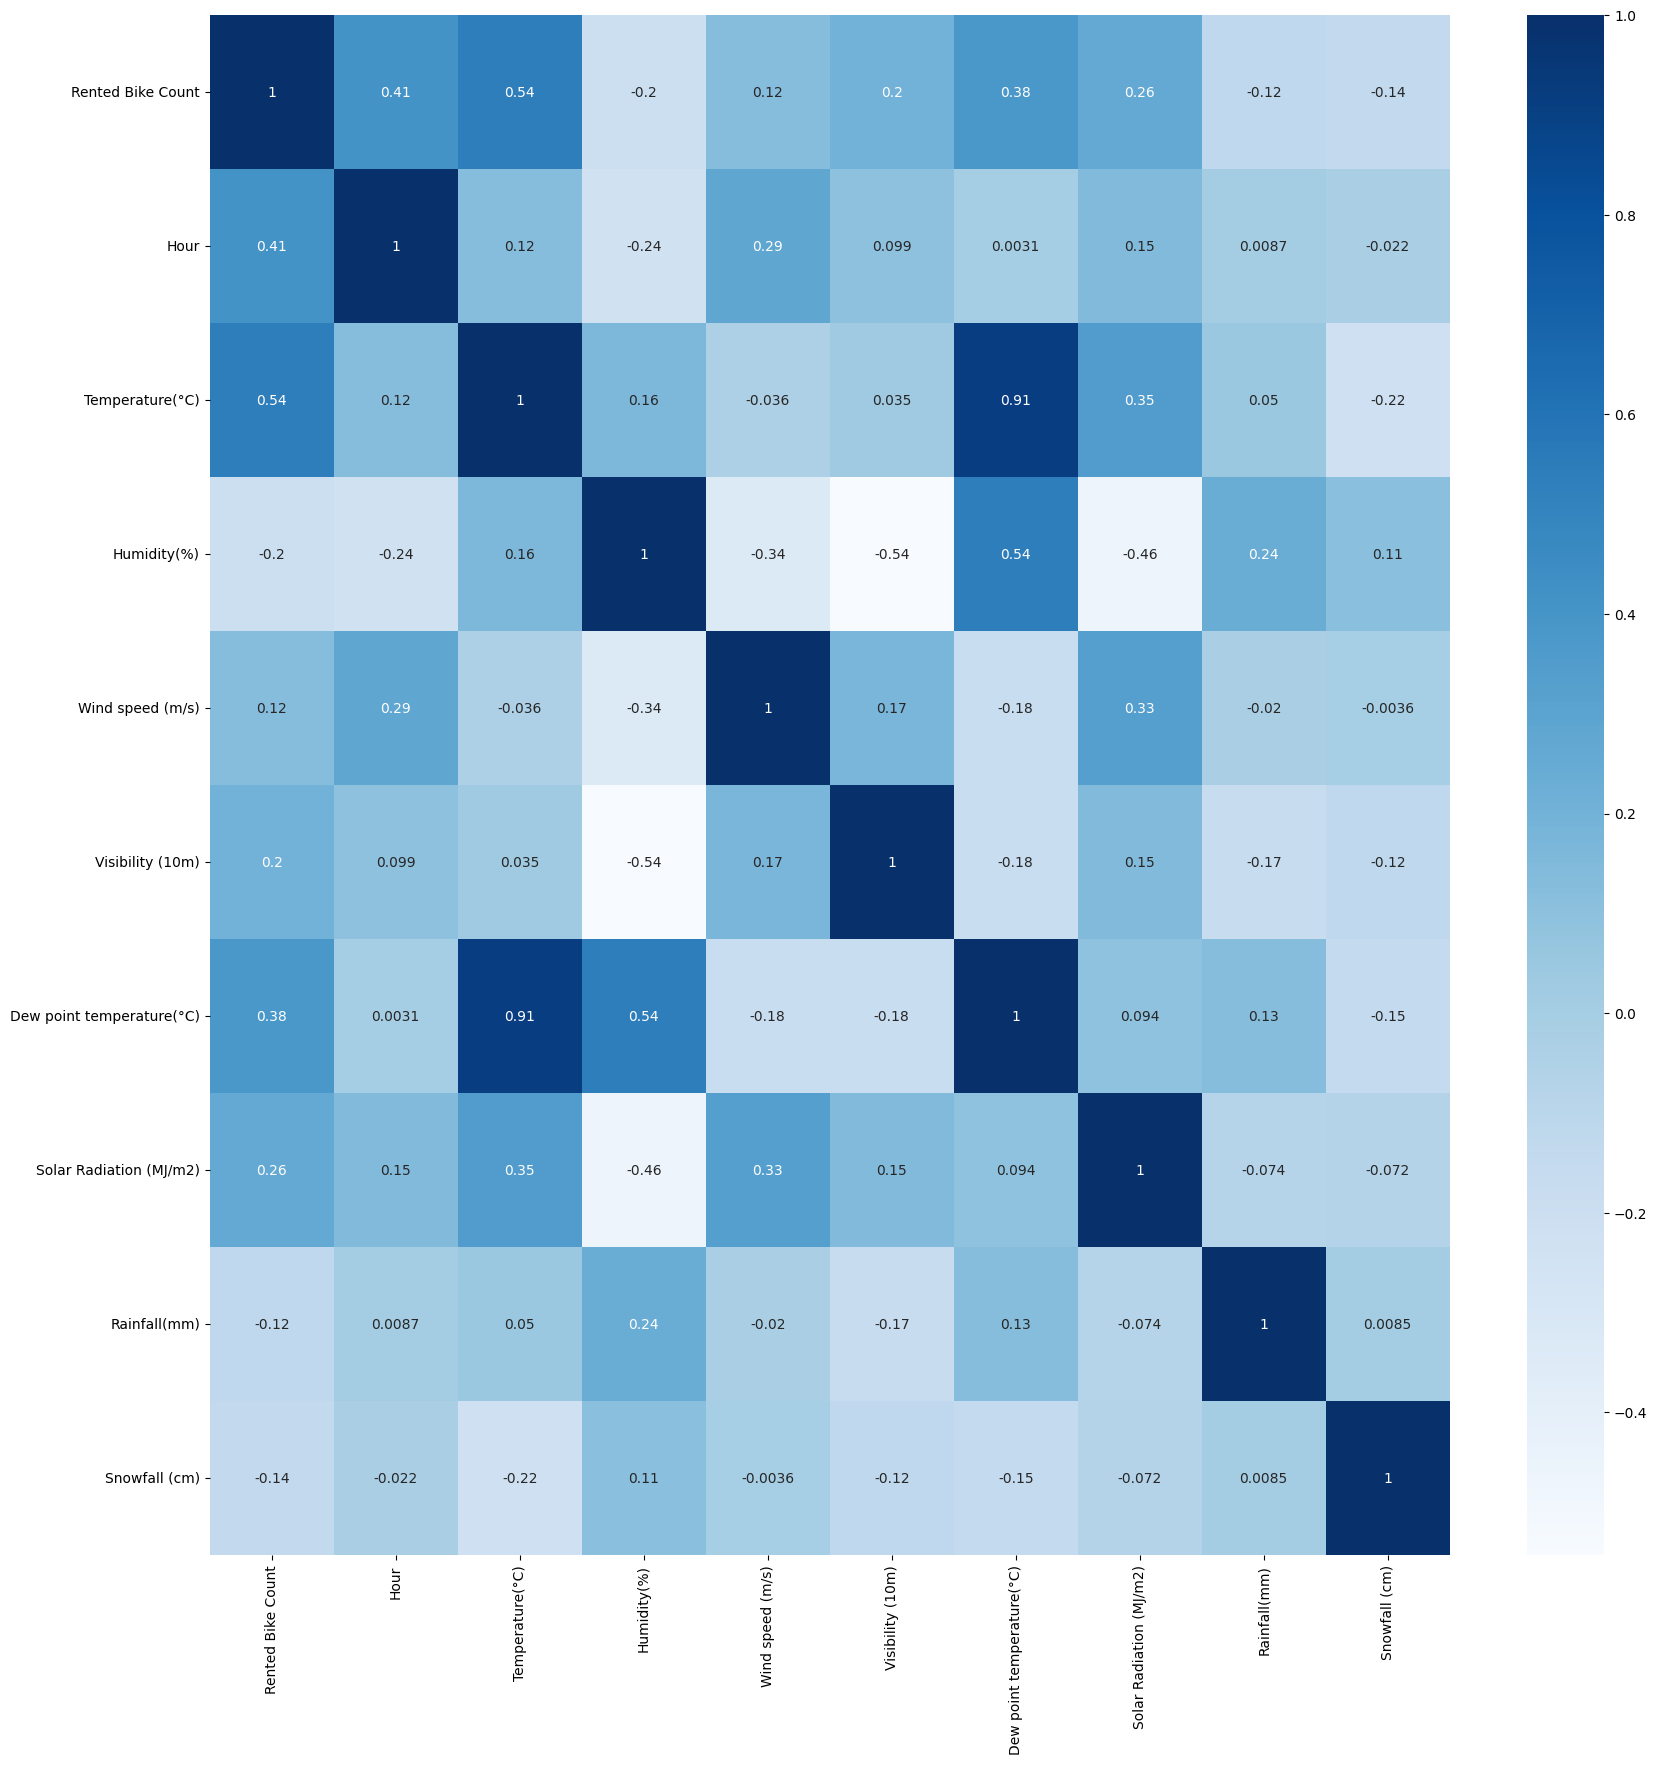

In [97]:
#Correlation Heatmap
plt.figure(figsize=(20,20))
corr= df_vis.corr()
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

In [98]:
#find and remove the correlated features
threshold=0.8
def correlated(X,threshold):
    col_corr=set()#set of all the names of correlated columns
#     print(col_corr)
    corr_matrix=X.corr()
#     print(corr_matrix)
    for i in range(len(corr_matrix.columns)):
#         print('i value',i)
        for j in range(i):
#             print('j value',j)
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]#getting the name of the column
                col_corr.add(colname)
    return col_corr

In [99]:
correlated(df_vis,threshold)

{'Dew point temperature(°C)'}

Insights 

1.Here we can take all feature vectors by checking the correlation between Rented Bike Count and other feature vectors.
2.But here we can see that high colleniarity 0.91 between Dew point temperature and Temperature column.So we can drop one of the column.

#Droping highly correlated columns

In [100]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

Exploring data

In [101]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [102]:
print("Categories in 'Date' variable:    ", end=" ")
print(df["Date"].unique())
print("Categories in 'Rented Bike Count' variable:    ", end=" ")
print(df["Rented Bike Count"].unique())
print("Categories in 'Hour' variable:    ", end=" ")
print(df["Hour"].unique())
print("Categories in 'Temperature(°C)' variable:    ", end=" ")
print(df["Temperature(°C)"].unique())
print("Categories in 'Wind speed (m/s)' variable:    ", end=" ")
print(df["Wind speed (m/s)"].unique())
print("Categories in 'Visibility (10m)' variable:    ", end=" ")
print(df["Visibility (10m)"].unique())
print("Categories in 'Solar Radiation (MJ/m2)' variable:    ", end=" ")
print(df["Solar Radiation (MJ/m2)"].unique())
print("Categories in 'Rainfall(mm)' variable:    ", end=" ")
print(df["Rainfall(mm)"].unique())
print("Categories in 'Snowfall (cm)' variable:    ", end=" ")
print(df["Snowfall (cm)"].unique())
print("Categories in 'Seasons' variable:    ", end=" ")
print(df["Seasons"].unique())
print("Categories in 'Holiday' variable:    ", end=" ")
print(df["Holiday"].unique())
print("Categories in 'Functioning Day' variable:    ", end=" ")
print(df["Functioning Day"].unique())

Categories in 'Date' variable:     ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '

In [103]:
#define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print columns

print(f'We have {len(numerical_features)} numerical features : {numerical_features} ')
print(f'We have {len(categorical_features)} categorical features : {categorical_features} ')



We have 9 numerical features : ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'] 
We have 4 categorical features : ['Date', 'Seasons', 'Holiday', 'Functioning Day'] 


Exploring Data Visualisation

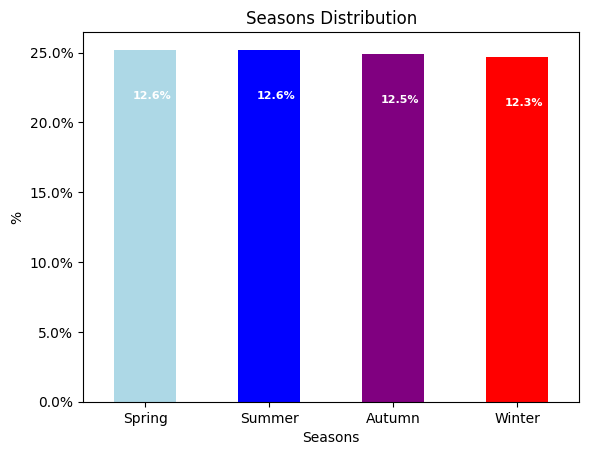

In [104]:
import matplotlib.ticker as mtick

colors = ["lightblue", "blue", "purple", "red", "black"]

ax = (df["Seasons"].value_counts() * 100.0 / len(df)).plot(
    kind="bar", stacked=True, rot=0, color=colors
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% ")
ax.set_xlabel("Seasons")
ax.set_ylabel("%")
ax.set_title("Seasons Distribution")

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        i.get_x() + 0.15,
        i.get_height() - 3.5,
        str(round((i.get_height() / total), 1)) + "%",
        fontsize=8,
        color="white",
        weight="bold",
    )

Insight: Almost all categories are distributed equally here.

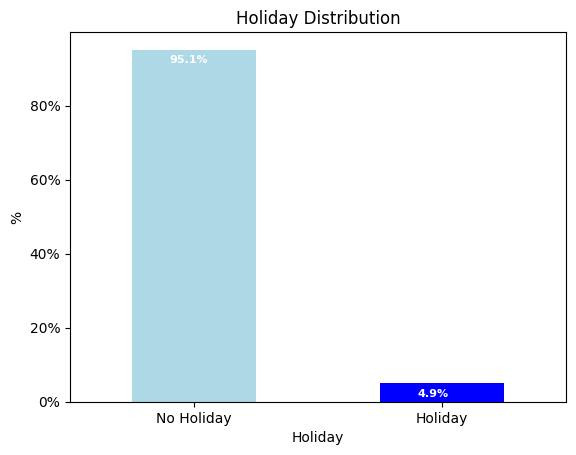

In [105]:
import matplotlib.ticker as mtick

colors = ['lightblue', 'blue', 'purple', 'red', 'black']

ax = (df['Holiday'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                      color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('Holiday')
ax.set_ylabel('%')
ax.set_title('Holiday Distribution')

#create a list to collect the plt.patches data
totals = [] 
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=8,
            color='white',
           weight = 'bold')

Insights:
    Only 4.9 % is holiday in the distribution.

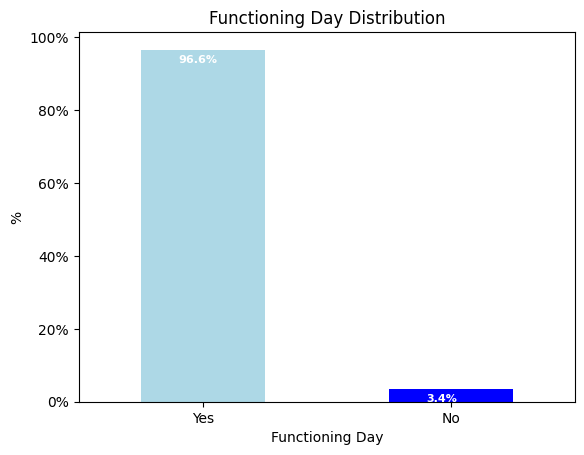

In [106]:
import matplotlib.ticker as mtick

colors = ['lightblue', 'blue', 'purple', 'red', 'black']

ax = (df['Functioning Day'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                      color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% ')
ax.set_xlabel('Functioning Day')
ax.set_ylabel('%')
ax.set_title('Functioning Day Distribution')

#create a list to collect the plt.patches data
totals = [] 
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=8,
            color='white',
           weight = 'bold')

Insight:
    Only 3.4% is functioning day in the distribution.